Processing 373 images for Color Analysis...


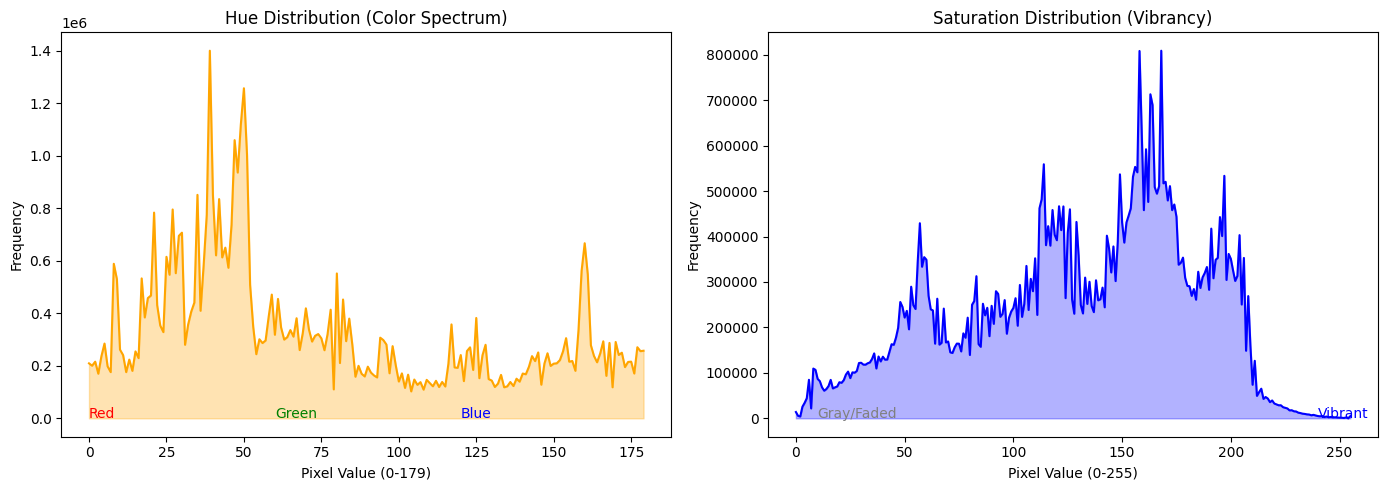

In [ ]:
import torch
from ultralytics import YOLO
torch.cuda.empty_cache()

# Load YOLOv8m model
model = YOLO("yolov8s.pt")

# Optimized configuration for 30K+ images on RTX 5060
results = model.train(
    data="FYP.v14i.yolov8/data.yaml",
    
    # ===== HARDWARE OPTIMIZATION =====
    epochs=100,             # Better convergence
    imgsz=640,              
    batch=16,               # Better GPU utilization
    device="cuda",
    workers=6,              # Parallel data loading
    cache='disk',           # Cache to disk for speed
    patience=25,            # Prevent early stopping

    # ===== OPTIMIZER & LEARNING RATE =====
    cos_lr=True,           # Cosine LR scheduler
    
    # ===== OUTPUT =====
    name="yolov8s-object-2",
    save_period=25,        # Save every 25 epochs
)